Tarea realizada por Lucy Fainerman y revisada en clase

Fuente de datos:
https://www.kaggle.com/datasets/thedevastator/supermarket-ordering-invoicing-and-sales-analysi

In [1]:
import pandas as pd

In [2]:
Invoices= pd.read_csv("Invoices.csv")
Invoices.head(1)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal
0,839FKFW2LLX4LMBB,27-05-2016,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469,Breakfast


In [3]:
OrderLeads= pd.read_csv("OrderLeads.csv")
OrderLeads.head(1)

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,18-02-2017,4875,1


In [4]:
#uno las bases de datos

In [5]:
len(OrderLeads)

100000

In [6]:
len(Invoices)

50017

In [7]:
orders_info=OrderLeads.merge(Invoices, left_on='Order Id', right_on= 'Order Id', how= 'left')
orders_info['Date'] = orders_info['Date_x'].fillna(orders_info['Date_y'])
orders_info.drop(['Date_x', 'Date_y'], axis=1, inplace=True)
orders_info['Company Id'] = orders_info['Company Id_x'].fillna(orders_info['Company Id_y'])
orders_info.drop(['Company Id_x', 'Company Id_y'], axis=1, inplace=True)
orders_info

,Order Id,Company Name,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Date,Company Id
0,80EYLOKP9E762WKG,Chimera-Chasing Casbah,4875,1,NaN,NaN,NaN,NaN,NaN,18-02-2017,LJKS5NK6788CYMUU
1,TLEXR1HZWTUTBHPB,Chimera-Chasing Casbah,8425,0,NaN,NaN,NaN,NaN,NaN,30-07-2015,LJKS5NK6788CYMUU
2,839FKFW2LLX4LMBB,Chimera-Chasing Casbah,4837,0,INBUX904GIHI8YBD,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,27-05-2016,LJKS5NK6788CYMUU
3,97OX39BGVMHODLJM,Chimera-Chasing Casbah,343,0,J0MMOOPP709DIDIE,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,27-09-2018,LJKS5NK6788CYMUU
4,5T4LGH4XGBWOD49Z,Chimera-Chasing Casbah,983,0,NaN,NaN,NaN,NaN,NaN,14-01-2016,LJKS5NK6788CYMUU
...,...,...,...,...,...,...,...,...,...,...,...
99995,4MFHIAQKH0HCACJM,Fierce Productivity,4851,0,NaN,NaN,NaN,NaN,NaN,25-07-2015,E4K99D4JR9E40VE1
99996,K1UP23P8SIY1YION,Fierce Productivity,7868,0,NaN,NaN,NaN,NaN,NaN,24-08-2015,E4K99D4JR9E40VE1
99997,NKHFWT5I2J9LPAPG,Fierce Productivity,5138,0,ORWFRT5TUSYGNYG7,2017-09-09 14:00:00+02:00,['Chester Mortimer' 'Robin Ramos'],365.0,Lunch,06-09-2017,E4K99D4JR9E40VE1
99998,OF79M3H9C44UM6PO,Fierce Productivity,2036,0,NaN,NaN,NaN,NaN,NaN,29-10-2015,E4K99D4JR9E40VE1


In [8]:
orders_info.isnull().sum()
#nos dice para cada columna cuantos datos nulos hay
#Fraud_Flag tiene tantos valores porque son todas las operaciones que no son fraudulentas

Order Id            0
Company Name        0
Order Value         0
Converted           0
Meal Id         49983
Date of Meal    49983
Participants    49983
Meal Price      49983
Type of Meal    49983
Date                0
Company Id          0
dtype: int64

In [9]:
orders_info['Meal Id']=orders_info['Meal Id'].fillna(0)
orders_info['Date of Meal']=orders_info['Date of Meal'].fillna(0)
orders_info['Participants']=orders_info['Participants'].fillna(0)
orders_info['Meal Price']=orders_info['Meal Price'].fillna(0)
orders_info['Type of Meal']=orders_info['Type of Meal'].fillna(0)
orders_info

,Order Id,Company Name,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Date,Company Id
0,80EYLOKP9E762WKG,Chimera-Chasing Casbah,4875,1,0,0,0,0.0,0,18-02-2017,LJKS5NK6788CYMUU
1,TLEXR1HZWTUTBHPB,Chimera-Chasing Casbah,8425,0,0,0,0,0.0,0,30-07-2015,LJKS5NK6788CYMUU
2,839FKFW2LLX4LMBB,Chimera-Chasing Casbah,4837,0,INBUX904GIHI8YBD,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,27-05-2016,LJKS5NK6788CYMUU
3,97OX39BGVMHODLJM,Chimera-Chasing Casbah,343,0,J0MMOOPP709DIDIE,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,27-09-2018,LJKS5NK6788CYMUU
4,5T4LGH4XGBWOD49Z,Chimera-Chasing Casbah,983,0,0,0,0,0.0,0,14-01-2016,LJKS5NK6788CYMUU
...,...,...,...,...,...,...,...,...,...,...,...
99995,4MFHIAQKH0HCACJM,Fierce Productivity,4851,0,0,0,0,0.0,0,25-07-2015,E4K99D4JR9E40VE1
99996,K1UP23P8SIY1YION,Fierce Productivity,7868,0,0,0,0,0.0,0,24-08-2015,E4K99D4JR9E40VE1
99997,NKHFWT5I2J9LPAPG,Fierce Productivity,5138,0,ORWFRT5TUSYGNYG7,2017-09-09 14:00:00+02:00,['Chester Mortimer' 'Robin Ramos'],365.0,Lunch,06-09-2017,E4K99D4JR9E40VE1
99998,OF79M3H9C44UM6PO,Fierce Productivity,2036,0,0,0,0,0.0,0,29-10-2015,E4K99D4JR9E40VE1


In [10]:
orders_info.isnull().sum()

Order Id        0
Company Name    0
Order Value     0
Converted       0
Meal Id         0
Date of Meal    0
Participants    0
Meal Price      0
Type of Meal    0
Date            0
Company Id      0
dtype: int64

In [11]:
orders_info['Meal Id'].unique()

array([0, 'INBUX904GIHI8YBD', 'J0MMOOPP709DIDIE', ..., 'LMX18PNGWCIMG1QW',
       '4U0VH2TGQL30X23X', 'ORWFRT5TUSYGNYG7'], dtype=object)

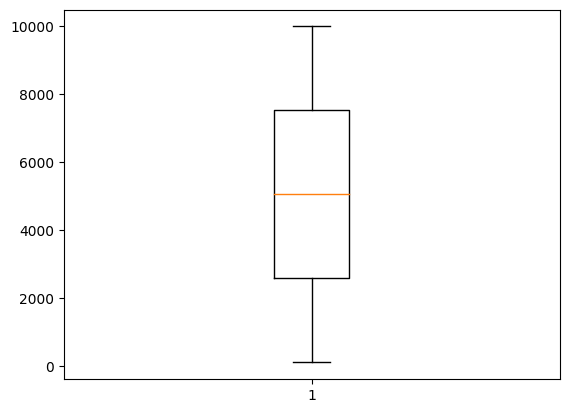

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(orders_info['Order Value'].values)
plt.show()

In [13]:
orders_info['Order Value'].describe()

count    100000.000000
mean       5051.859850
std        2859.400416
min         100.000000
25%        2586.000000
50%        5056.000000
75%        7528.000000
max        9999.000000
Name: Order Value, dtype: float64

### Agregado por el docente en clase

In [26]:
df_ = OrderLeads.merge(Invoices, left_on='Order Id', right_on= 'Order Id', how= 'left')
df_.head(1)

,Order Id,Company Id_x,Company Name,Date_x,Order Value,Converted,Date_y,Meal Id,Company Id_y,Date of Meal,Participants,Meal Price,Type of Meal
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,18-02-2017,4875,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
orders_converted = df_[df_['Converted']==1]
orders_converted['Order Value'].sum()

85334405

In [28]:
orders_converted['Type of Meal'].unique()

array([nan, 'Breakfast', 'Dinner', 'Lunch'], dtype=object)

In [29]:
df_order_dropna = orders_converted.dropna()
df_order_dropna['Type of Meal'].unique()

array(['Breakfast', 'Dinner', 'Lunch'], dtype=object)

In [30]:
df_filter = df_order_dropna.groupby('Type of Meal').count().reset_index()

In [31]:
x = df_filter[['Type of Meal','Order Id']]['Type of Meal']
y= df_filter[['Type of Meal','Order Id']]['Order Id']
print(x)
print(y)

0    Breakfast
1       Dinner
2        Lunch
Name: Type of Meal, dtype: object
0    4246
1    4270
2    3999
Name: Order Id, dtype: int64


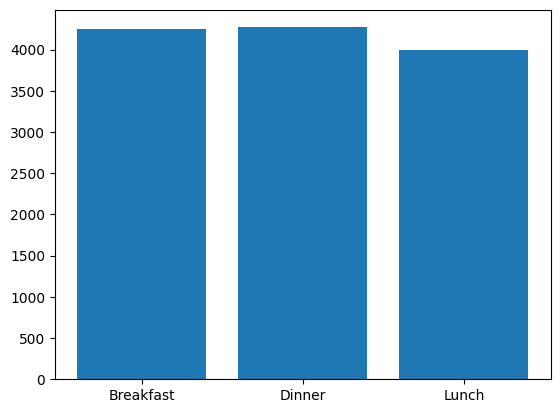

In [32]:
plt.bar(x,y)
plt.show()